In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.18.0
Hub version: 0.16.1
GPU available (YESS!!!!)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting our data ready

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/DogBreed1/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


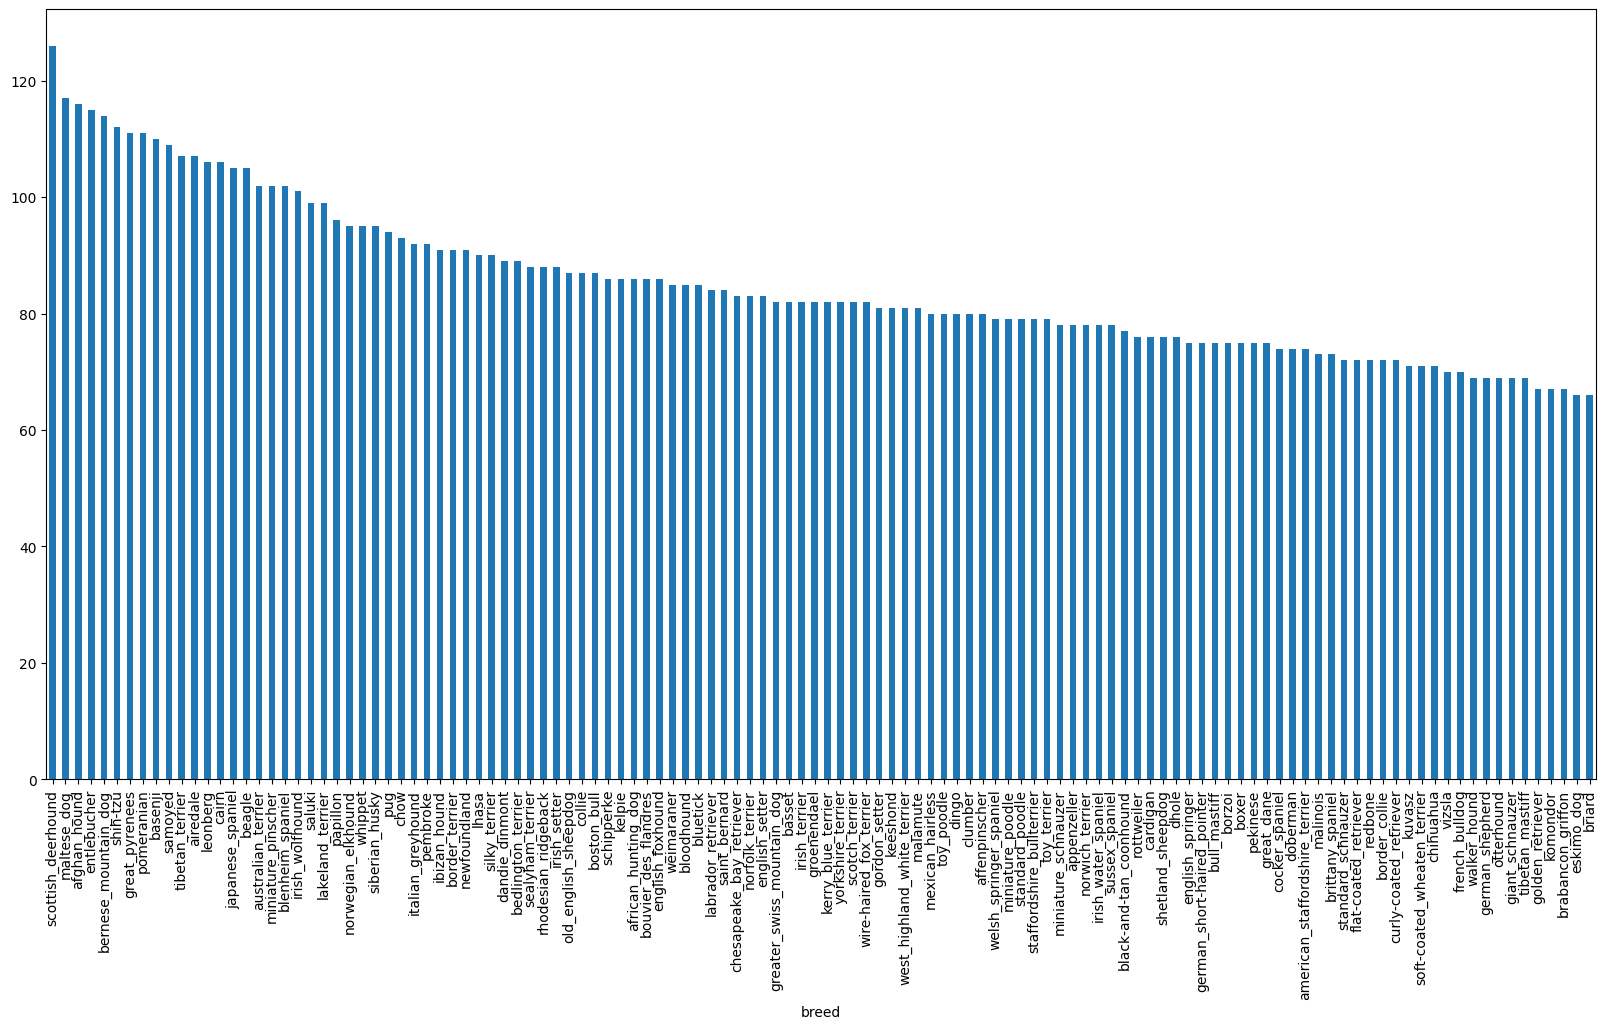

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

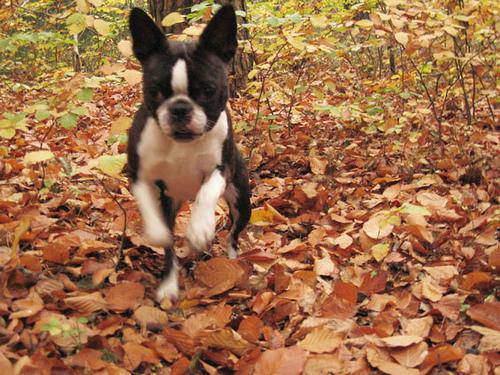

In [ ]:
from IPython.display import display, Image
Image("drive/My Drive/DogBreed1/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/DogBreed1/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['drive/My Drive/DogBreed1/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/DogBreed1/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/DogBreed1/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/DogBreed1/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/DogBreed1/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/DogBreed1/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/DogBreed1/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/DogBreed1/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/DogBreed1/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/DogBreed1/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/DogBreed1/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


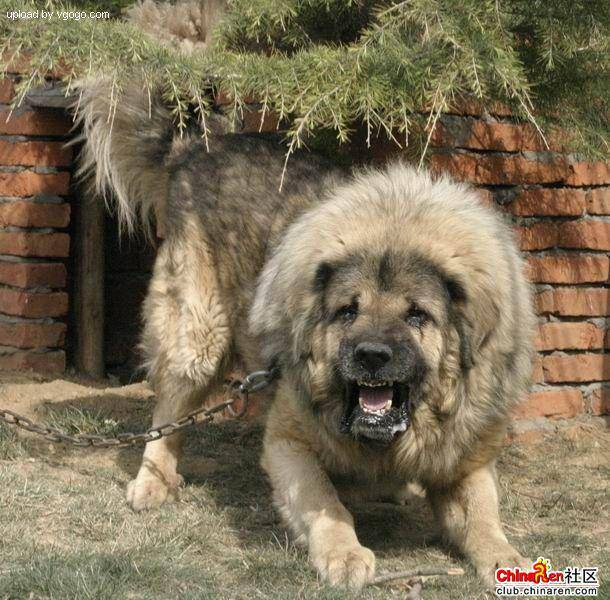

In [ ]:
# Check an image directly from a filepath
Image(filenames[9000])

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['drive/My Drive/DogBreed1/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/DogBreed1/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/DogBreed1/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/DogBreed1/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/DogBreed1/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocess Images

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualization of Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

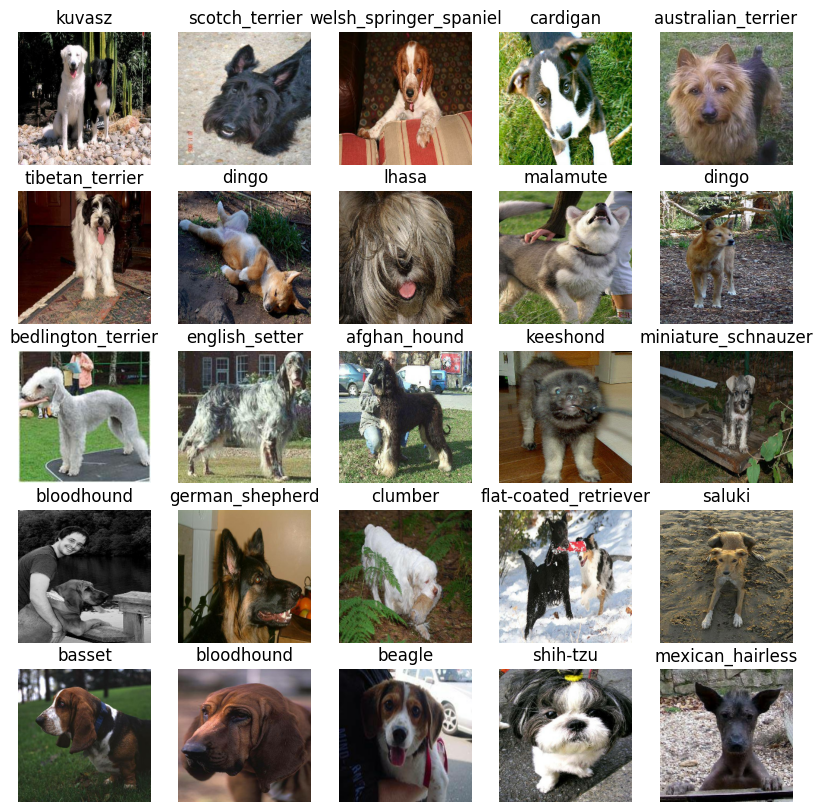

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

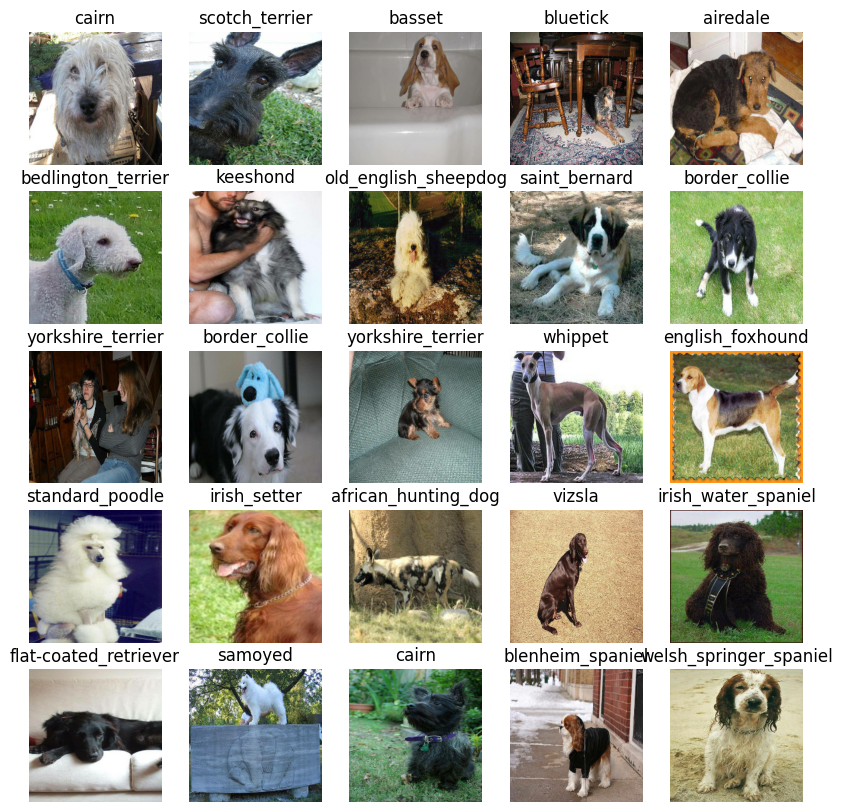

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define input image size
IMG_SIZE = 224
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
OUTPUT_SHAPE = len(unique_breeds) 

# Function to create the MobileNetV2 model
def create_mobilenetv2_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE):
    print("Building MobileNetV2 model for dog breed classification...")

    # Load MobileNetV2 base model (pretrained on ImageNet)
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape) # Create an instance of MobileNetV2
    base_model.trainable = False  # Freeze base model for feature extraction

    # Build the classifier on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Reduce dimensionality
    x = Dropout(0.3)(x)  # Regularization to prevent overfitting
    output_layer = Dense(output_shape, activation="softmax")(x)  # Output layer

    # Create the model
    model = Model(inputs=base_model.input, outputs=output_layer) # Use Functional API to combine layers

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        metrics=["accuracy"]
    )

    return model

# Create and summarize the model
model = create_mobilenetv2_model()
model.summary()

Building MobileNetV2 model for dog breed classification...


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,411,704 (9.20 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

## Training a Model (on subset of data)

In [ ]:
import os
import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

try:
    get_ipython().run_line_magic("load_ext", "tensorboard")
except:
    pass 

#Create TensorBoard Callback Function
def create_tensorboard_callback(log_dir="logs/fit"):
    """
    Creates a TensorBoard callback for logging training metrics.
    """
    logdir = os.path.join(log_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return TensorBoard(log_dir=logdir, histogram_freq=1)

#Create Early Stopping Callback
early_stopping = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

# Define Number of Epochs
NUM_EPOCHS = 100 

#Build a Function to Train the Model
def train_model(model, train_data, val_data, epochs=NUM_EPOCHS, batch_size=32):

    #Create TensorBoard Callback
    tensorboard_callback = create_tensorboard_callback()

    #Train the model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[tensorboard_callback, early_stopping]
    )

    return model

# Define Dataset Paths
train_dir = train_data
val_dir = val_data

# Create and Train the Model
model = create_mobilenetv2_model(input_shape=(224, 224, 3), output_shape=len(unique_breeds))
model = train_model(model, train_dir, val_dir)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Building MobileNetV2 model for dog breed classification...
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 257s 10s/step - accuracy: 0.0062 - loss: 5.1892 - val_accuracy: 0.0150 - val_loss: 4.8994
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step - accuracy: 0.0201 - loss: 4.8000 - val_accuracy: 0.0200 - val_loss: 4.6982
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.0370 - loss: 4.5182 - val_accuracy: 0.0400 - val_loss: 4.5131
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.0757 - loss: 4.2124 - val_accuracy: 0.0650 - val_loss: 4.3404
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.1211 - loss: 3.9697 - val_accuracy: 0.1050 - val_loss: 4.1713
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.1601 - loss: 3.7160 - val_accuracy: 0.1400 - val_loss: 4.0135
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.2463 -

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 695ms/step


array([[0.00338289, 0.01708692, 0.00105814, ..., 0.00268615, 0.00152792,
        0.01957597],
       [0.00252929, 0.00334288, 0.01964089, ..., 0.00052488, 0.00429651,
        0.00288411],
       [0.00064112, 0.00410551, 0.00182813, ..., 0.00361371, 0.00033474,
        0.01231386],
       ...,
       [0.00096166, 0.00089339, 0.00257464, ..., 0.00114733, 0.00100912,
        0.00207205],
       [0.00757587, 0.00107136, 0.00069125, ..., 0.0010854 , 0.00083047,
        0.02631288],
       [0.00036435, 0.00042812, 0.00128218, ..., 0.00223246, 0.00180876,
        0.00188814]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[3.3828907e-03 1.7086919e-02 1.0581358e-03 1.3479752e-03 8.8365457e-04
 1.7774584e-03 6.8895365e-03 1.1349141e-03 1.9102891e-03 5.2408082e-04
 2.5385658e-03 1.8646896e-03 3.6887176e-04 9.9313108e-04 1.0587656e-03
 6.7893119e-04 5.3794606e-04 8.9252712e-03 3.9951303e-03 4.7091089e-04
 4.9962946e-03 6.8384287e-04 8.8818942e-04 3.6122298e-03 2.1170134e-04
 4.2566549e-04 1.4566354e-02 1.8890448e-03 3.3802174e-03 2.0599104e-03
 1.0207153e-03 1.1324864e-02 1.4439475e-03 6.5716560e-04 8.2388445e-04
 2.8855324e-02 5.2016549e-04 4.5364149e-04 8.9579006e-04 2.2377301e-04
 2.3820365e-03 3.4545254e-05 2.0215022e-04 2.6877379e-04 5.2689144e-04
 5.8515609e-04 5.5948291e-05 1.5389861e-03 1.6052149e-03 2.0706379e-03
 1.2853225e-03 4.3687021e-04 6.6375425e-03 9.1080402e-04 5.1847711e-04
 3.5559051e-04 3.6969178e-04 5.0420570e-03 7.2526763e-04 3.3692017e-02
 1.1827103e-03 8.0753310e-04 7.9930993e-04 5.8710248e-05 1.0723566e-03
 1.1540239e-02 3.5154684e-03 4.8939785e-04 2.1527246e-02 4.7619539e-04
 2.413

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'lhasa'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

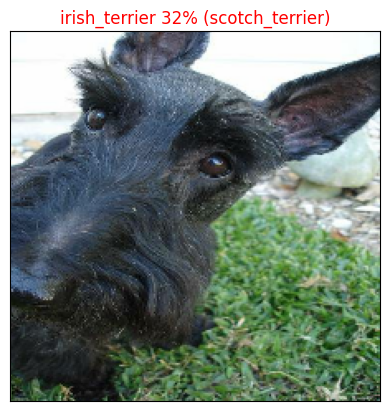

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

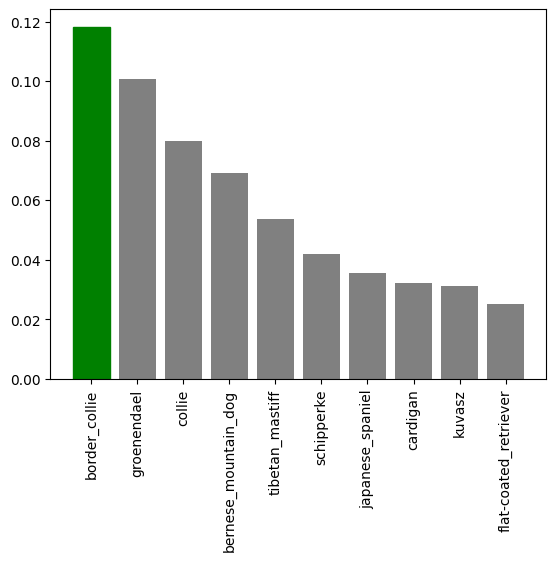

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

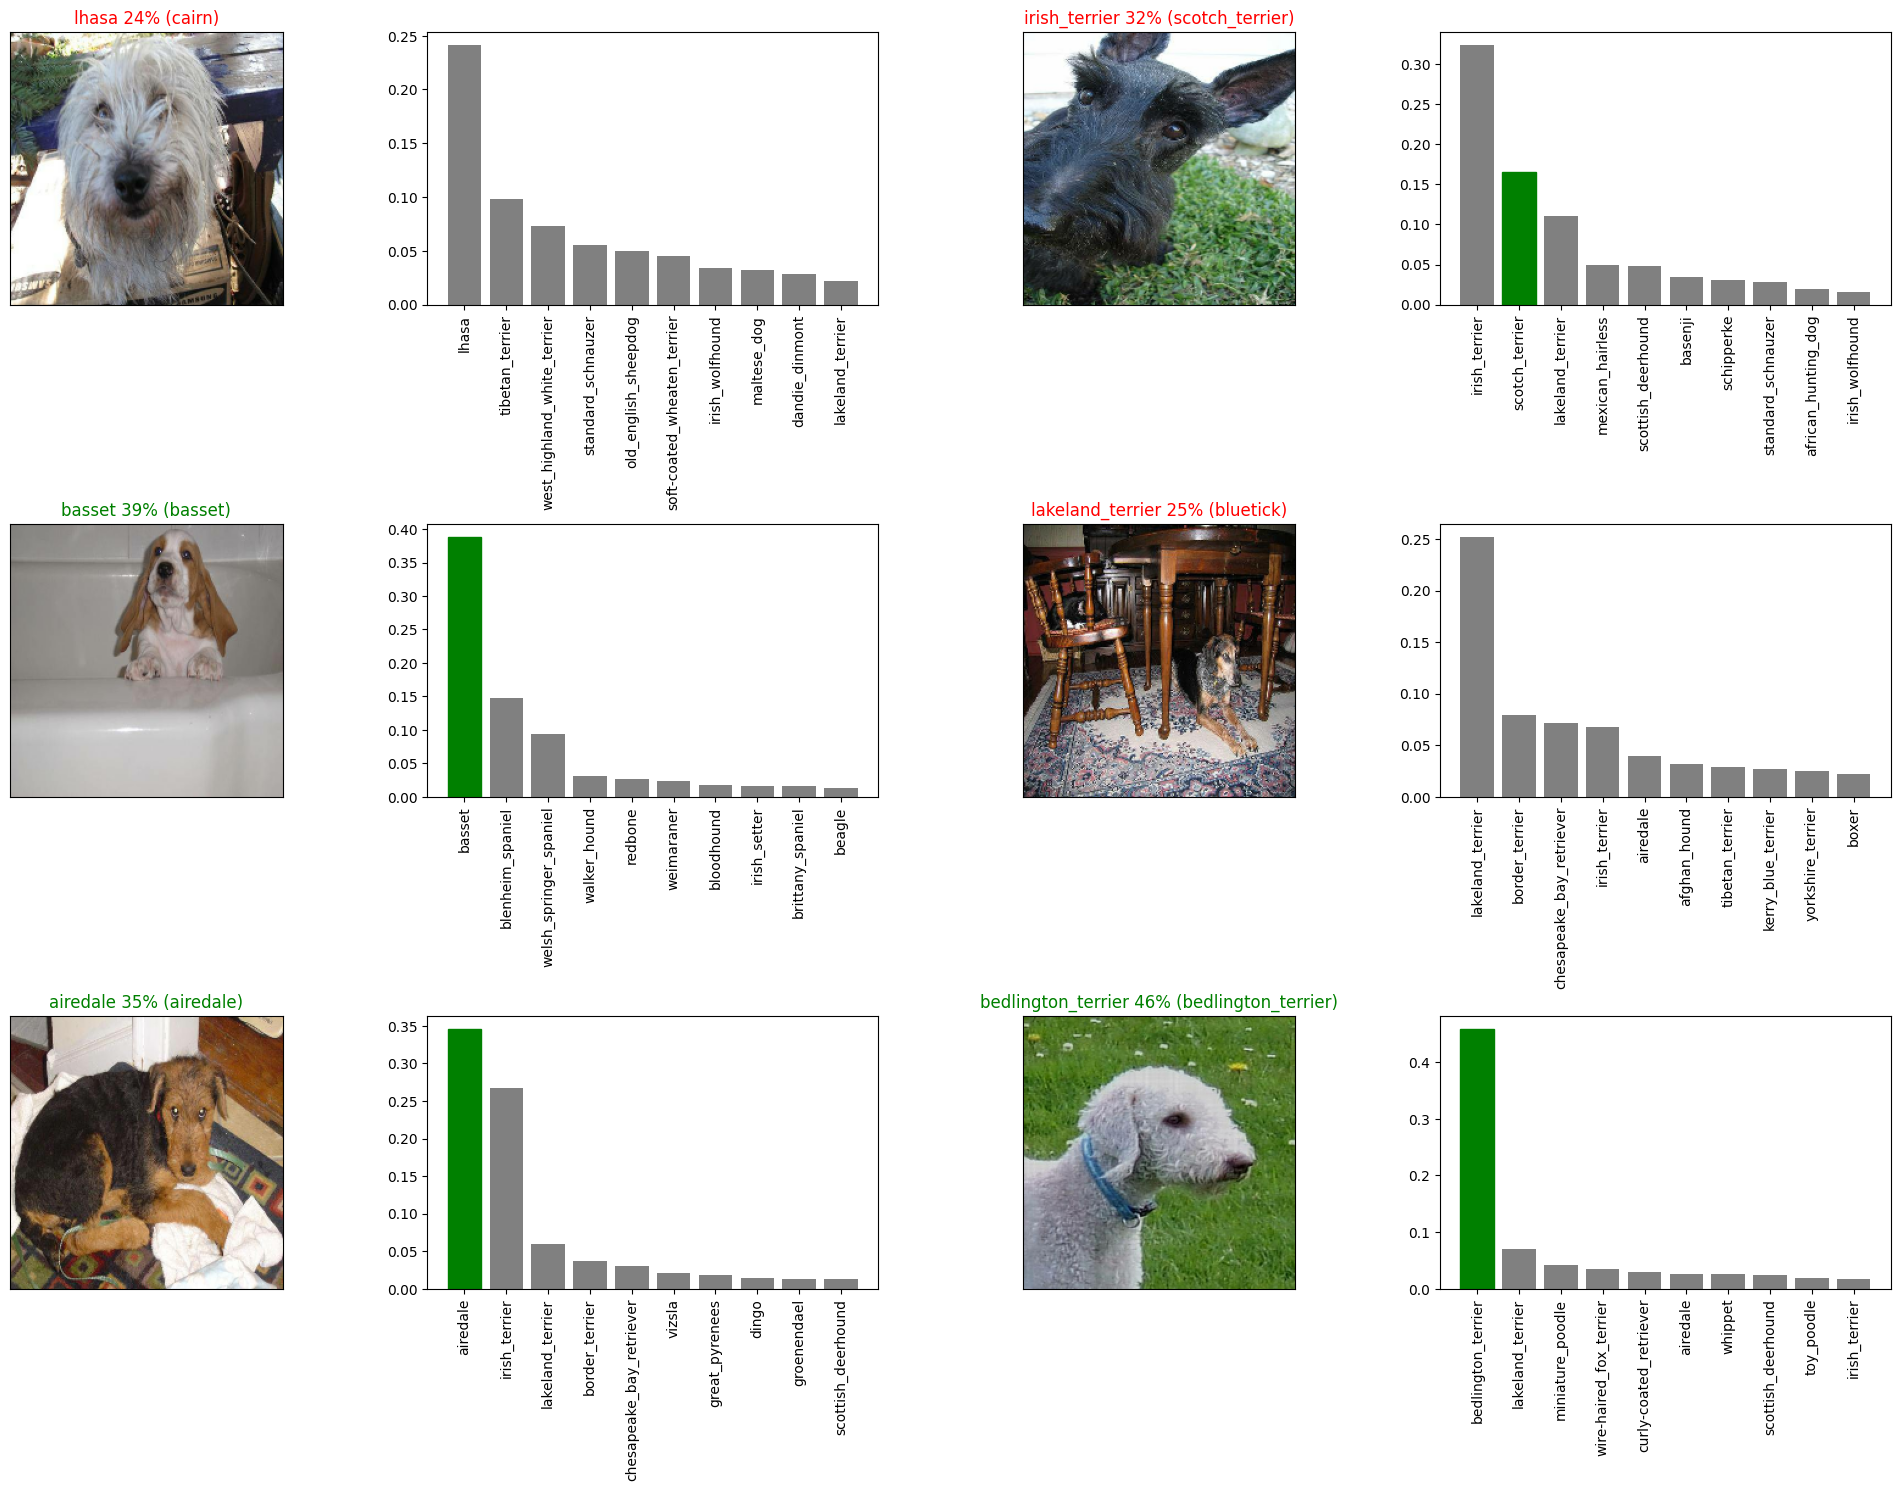

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Save and load a Pre-trained model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/DogBreed1/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".keras" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/DogBreed1/models/20250401-18161743531403-1000-images-Adam.keras...


'drive/My Drive/DogBreed1/models/20250401-18161743531403-1000-images-Adam.keras'

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/DogBreed1/models/20250401-18161743531403-1000-images-Adam.keras')

Loading saved model from: drive/My Drive/DogBreed1/models/20250401-18161743531403-1000-images-Adam.keras


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5710 - loss: 1.9542 


[2.0063278675079346, 0.574999988079071]

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 439ms/step - accuracy: 0.5710 - loss: 1.9542


[2.0063278675079346, 0.574999988079071]

In [ ]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

In [ ]:
# Define image size
IMG_SIZE = (224, 224)  # Changed to a tuple

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=IMG_SIZE) # Use IMG_SIZE directly
  return image

In [ ]:
# Turn full training data in a data batch
fulldata = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_model = create_mobilenetv2_model(output_shape=len(unique_breeds))

Building MobileNetV2 model for dog breed classification...


In [ ]:
def create_tensorboard_callback(log_dir="logs/full_training"):
    logdir = log_dir + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

full_model_tensorboard = create_tensorboard_callback()

# ✅ Early stopping (monitor training loss)
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=3,
    restore_best_weights=True
)

## Training the model on full dataset

In [ ]:
full_model.fit(
    fulldata,  # 🔹 Use the dataset directly
    epochs=NUM_EPOCHS,
    callbacks=[full_model_tensorboard, full_model_early_stopping]
)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1976s 6s/step - accuracy: 0.0536 - loss: 4.6437
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 71s 125ms/step - accuracy: 0.3708 - loss: 2.8465
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.5613 - loss: 1.9864
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.6533 - loss: 1.5385
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 126ms/step - accuracy: 0.7030 - loss: 1.2578
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.7308 - loss: 1.0935
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 127ms/step - accuracy: 0.7629 - loss: 0.9560
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.7693 - loss: 0.8724
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 126ms/step - accuracy: 0.7911 - loss: 0.8035
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.8110 - loss: 0.7279
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 44s 138ms/step - accuracy: 0.8245 - loss: 0.6792
Epoch 12/

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/My Drive/DogBreed1/models/20250401-20221743538936-all-images-Adam.keras...


'drive/My Drive/DogBreed1/models/20250401-20221743538936-all-images-Adam.keras'